# 1° Modo

## Import Required Libraries
Import the necessary libraries, including NumPy, SciPy, and Matplotlib.

In [1]:
# Import Required Libraries
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Ensure inline plotting for Jupyter notebooks
%matplotlib inline

## Define Continuous-Time Signal
Define a continuous-time signal composed of different frequencies.

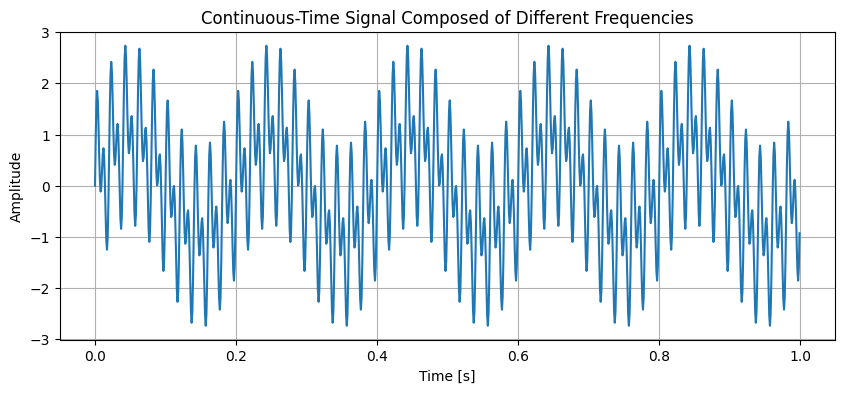

In [2]:
# Define Continuous-Time Signal

# Define the time vector
t = np.linspace(0, 1, 1000, endpoint=False)

# Define the continuous-time signal composed of different frequencies
frequencies = [5, 50, 100]  # Frequencies in Hz
continuous_signal = sum(np.sin(2 * np.pi * f * t) for f in frequencies)

# Plot the continuous-time signal
plt.figure(figsize=(10, 4))
plt.plot(t, continuous_signal)
plt.title('Continuous-Time Signal Composed of Different Frequencies')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## Sample the Continuous-Time Signal
Sample the continuous-time signal at a specified sampling rate.

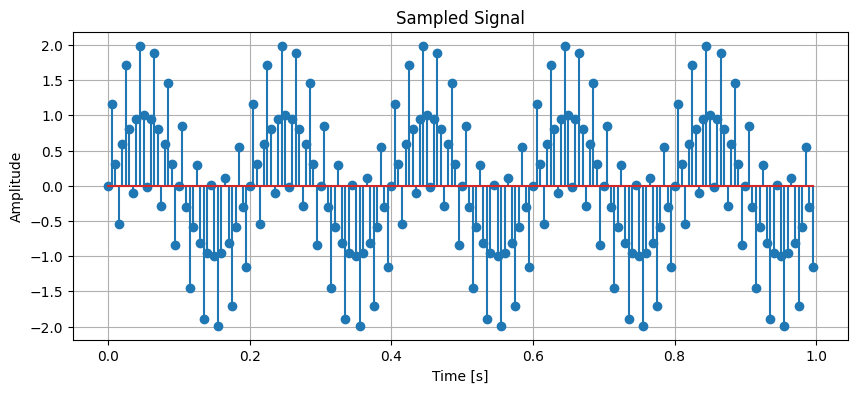

In [7]:
# Sample the Continuous-Time Signal

# Define the sampling rate
sampling_rate = 200  # Sampling rate in Hz

# Sample the continuous-time signal
n = np.arange(0, 1, 1/sampling_rate)
sampled_signal = sum(np.sin(2 * np.pi * f * n) for f in frequencies)

# Plot the sampled signal
plt.figure(figsize=(10, 4))
plt.stem(n, sampled_signal)
plt.title('Sampled Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## Design Discrete-Time Lowpass Filter
Design a discrete-time lowpass filter using appropriate filter design functions.

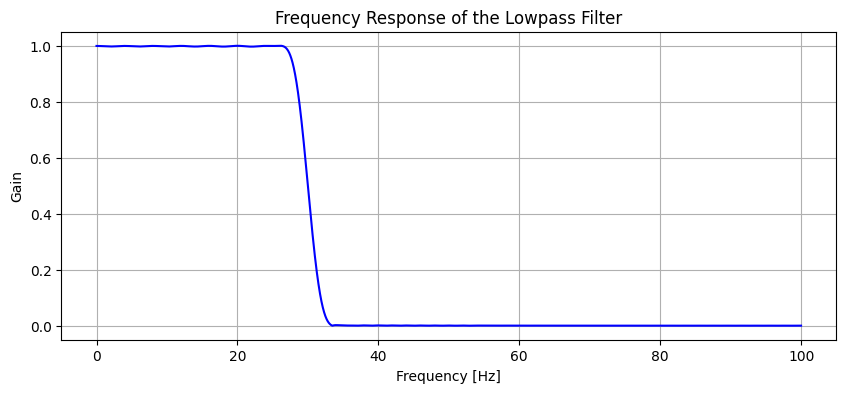

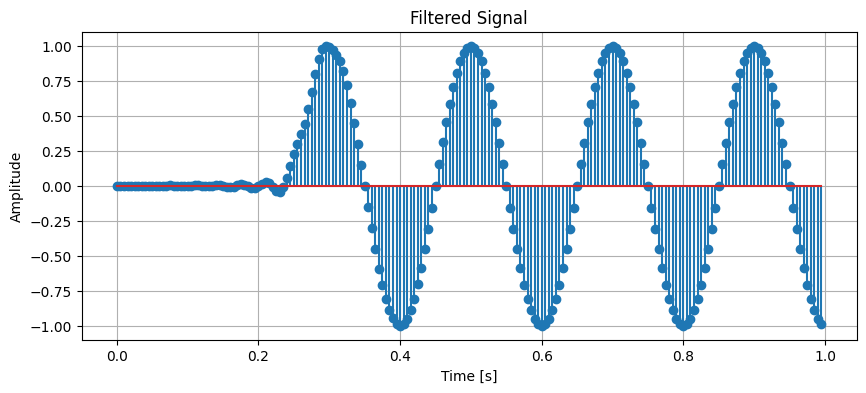

In [9]:
# Design Discrete-Time Lowpass Filter

# Define the cutoff frequency for the lowpass filter
cutoff_frequency = 30  # Cutoff frequency in Hz

# Normalize the cutoff frequency with respect to the Nyquist frequency
nyquist_rate = sampling_rate / 2
normalized_cutoff = cutoff_frequency / nyquist_rate

# Design the lowpass filter using a Hamming window
num_taps = 101  # Number of filter coefficients (taps)
lowpass_filter = signal.firwin(num_taps, normalized_cutoff, window='hamming')

# Apply the lowpass filter to the sampled signal
filtered_signal = signal.lfilter(lowpass_filter, 1.0, sampled_signal)

# Plot the frequency response of the filter
w, h = signal.freqz(lowpass_filter, worN=8000)
plt.figure(figsize=(10, 4))
plt.plot(0.5 * sampling_rate * w / np.pi, np.abs(h), 'b')
plt.title('Frequency Response of the Lowpass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid(True)
plt.show()

# Plot the filtered signal
plt.figure(figsize=(10, 4))
plt.stem(n, filtered_signal)
plt.title('Filtered Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## Apply Discrete-Time Lowpass Filter
Apply the designed discrete-time lowpass filter to the sampled signal.

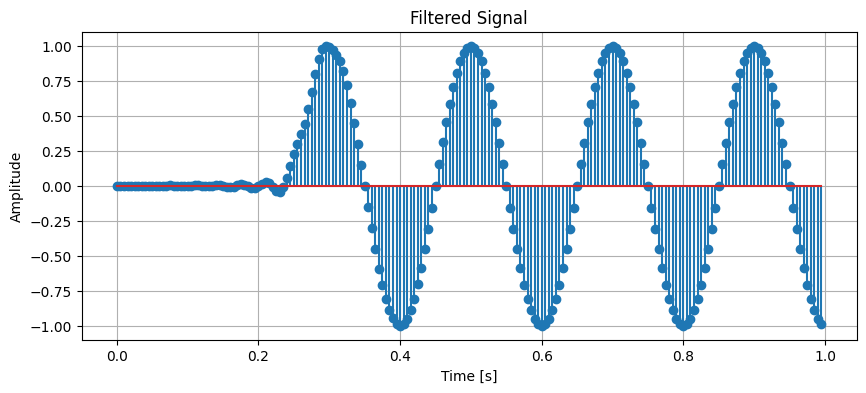

In [11]:
# Apply Discrete-Time Lowpass Filter

# Apply the designed discrete-time lowpass filter to the sampled signal
filtered_signal = signal.lfilter(lowpass_filter, 1.0, sampled_signal)

# Plot the filtered signal
plt.figure(figsize=(10, 4))
plt.stem(n, filtered_signal)
plt.title('Filtered Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## Plot Results
Plot the original continuous-time signal, the sampled signal, and the filtered signal to visualize the filtering effect.

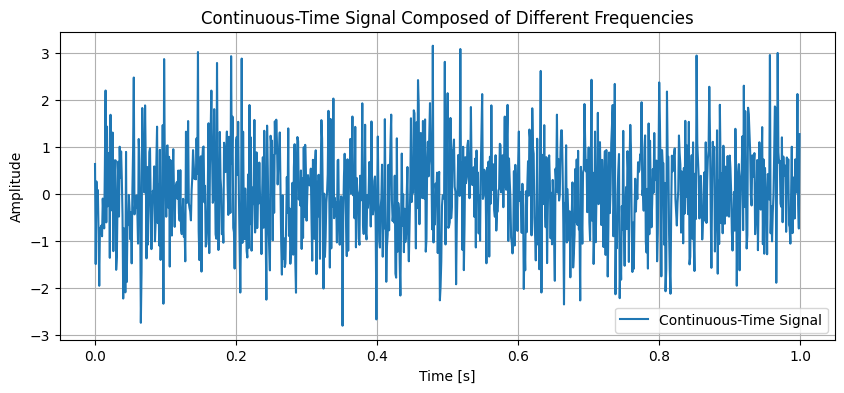

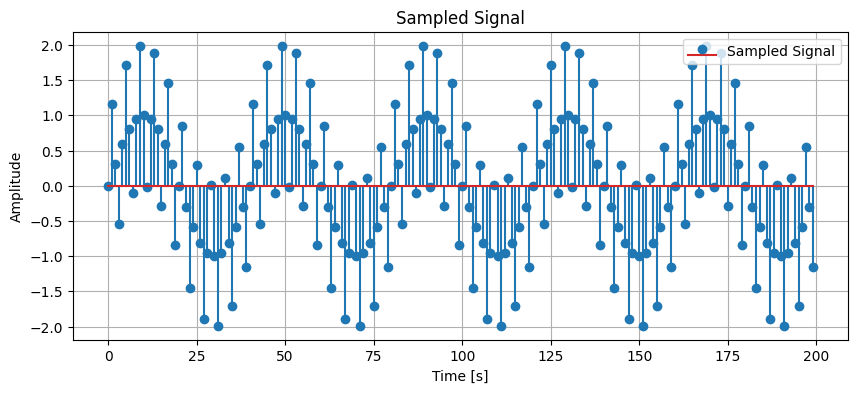

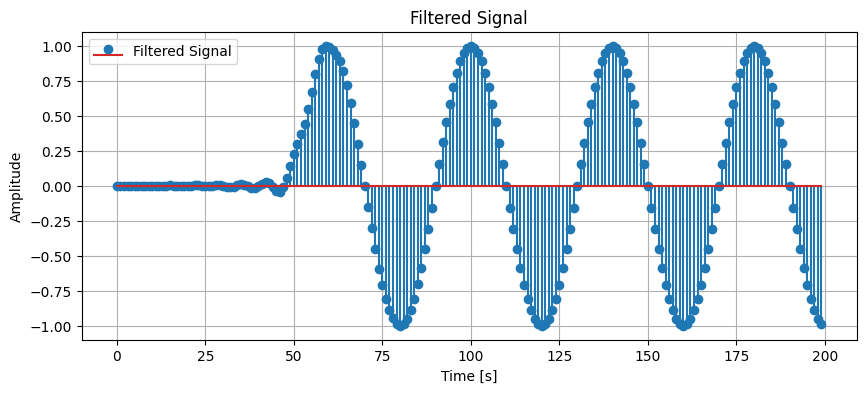

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming continuous_signal, sampled_signal, and filtered_signal are defined elsewhere in your code
# Ensure continuous_signal has the same length as time_vector
continuous_signal = np.random.randn(1000)  # Example signal, replace with actual signal

# Use a different variable name for the time vector to avoid conflicts
time_vector = np.linspace(0, 1, 1000, endpoint=False)

# Plot the original continuous-time signal
plt.figure(figsize=(10, 4))
plt.plot(time_vector, continuous_signal, label='Continuous-Time Signal')
plt.title('Continuous-Time Signal Composed of Different Frequencies')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Assuming n is defined and has the same length as sampled_signal and filtered_signal
n = np.arange(len(sampled_signal))  # Example, replace with actual n

# Plot the sampled signal
plt.figure(figsize=(10, 4))
plt.stem(n, sampled_signal, label='Sampled Signal')
plt.title('Sampled Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Plot the filtered signal
plt.figure(figsize=(10, 4))
plt.stem(n, filtered_signal, label='Filtered Signal')
plt.title('Filtered Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# 2° Modo

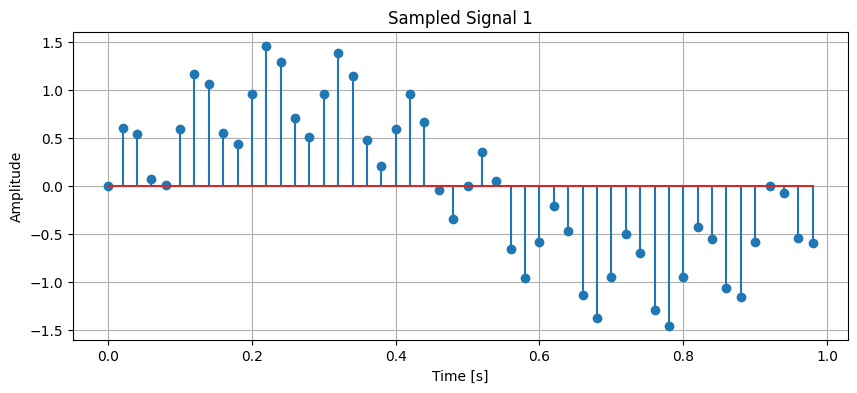

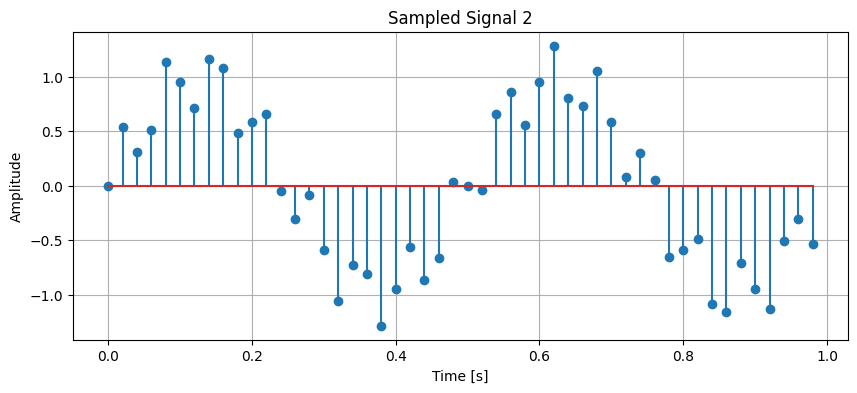

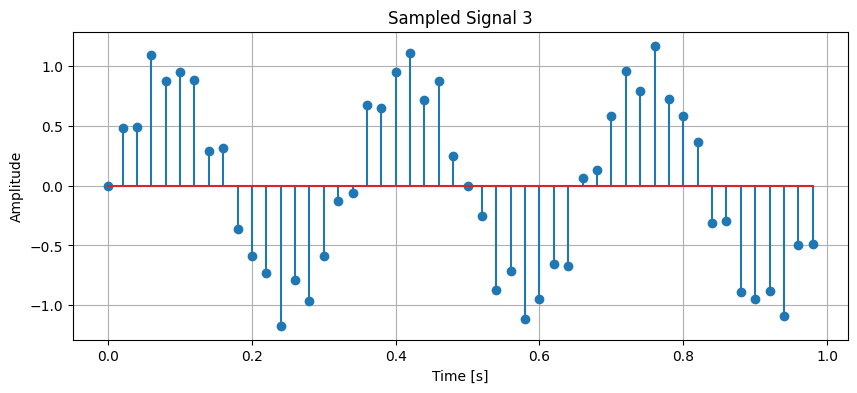

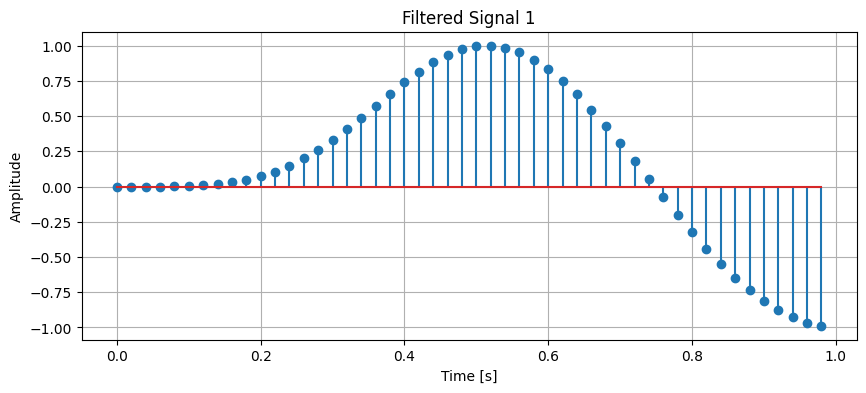

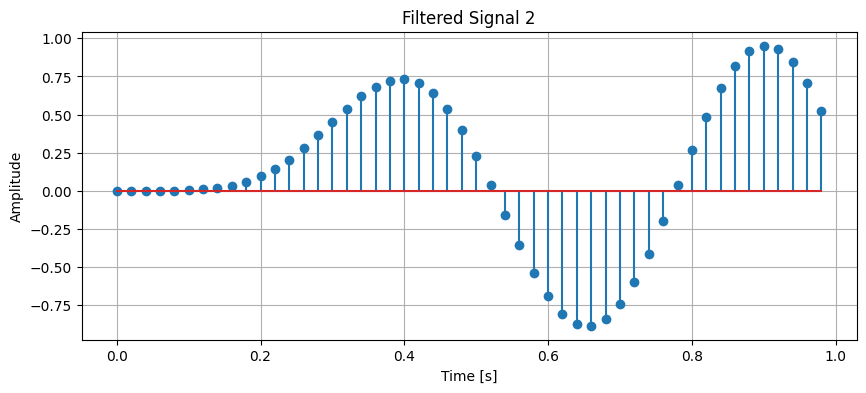

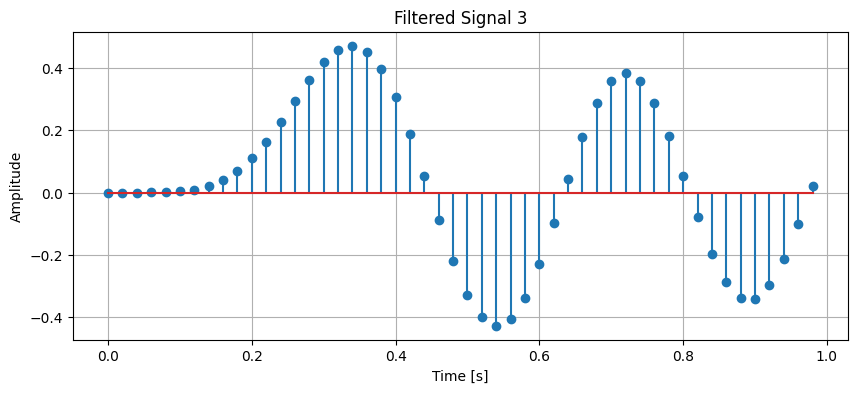

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Define continuous-time signals
def continuous_signal_1(t):
    return np.sin(2 * np.pi * 1 * t) + 0.5 * np.sin(2 * np.pi * 10 * t)

def continuous_signal_2(t):
    return np.sin(2 * np.pi * 2 * t) + 0.3 * np.sin(2 * np.pi * 15 * t)

def continuous_signal_3(t):
    return np.sin(2 * np.pi * 3 * t) + 0.2 * np.sin(2 * np.pi * 20 * t)

# Sampling parameters
Fs = 50  # Sampling frequency
Ts = 1 / Fs  # Sampling interval
t = np.arange(0, 1, Ts)  # Time vector

# Sample the continuous-time signals
sampled_signal_1 = continuous_signal_1(t)
sampled_signal_2 = continuous_signal_2(t)
sampled_signal_3 = continuous_signal_3(t)

# Plot the sampled signals
plt.figure(figsize=(10, 4))
plt.stem(t, sampled_signal_1)
plt.title('Sampled Signal 1')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.stem(t, sampled_signal_2)
plt.title('Sampled Signal 2')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.stem(t, sampled_signal_3)
plt.title('Sampled Signal 3')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Design a discrete-time lowpass filter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Filter parameters
cutoff_frequency = 2.5  # Cutoff frequency of the filter
order = 6

# Apply the lowpass filter to the sampled signals
filtered_signal_1 = butter_lowpass_filter(sampled_signal_1, cutoff_frequency, Fs, order)
filtered_signal_2 = butter_lowpass_filter(sampled_signal_2, cutoff_frequency, Fs, order)
filtered_signal_3 = butter_lowpass_filter(sampled_signal_3, cutoff_frequency, Fs, order)

# Plot the filtered signals
plt.figure(figsize=(10, 4))
plt.stem(t, filtered_signal_1)
plt.title('Filtered Signal 1')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.stem(t, filtered_signal_2)
plt.title('Filtered Signal 2')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.stem(t, filtered_signal_3)
plt.title('Filtered Signal 3')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()